<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 30px;">  Task :  Building data pipelines in Python </h1>

### What Is Data Pipelining?

Data pipelining refers to the process of automating the flow of data through a series of steps, where data is collected, processed, and delivered to a destination for further use. It ensures that data moves efficiently from one stage to another, transforming and optimizing it along the way.<br>
The goal of a data pipeline is to enable seamless and reliable data transfer while making it ready for analysis, visualization, or machine learning models.

### Key Stages of a Data Pipeline

#### **Extract (E):**
Data is collected from various sources like:
- **Databases** (e.g., MySQL, MongoDB)
- **APIs** (e.g., weather data, stock prices)
- **Files** (e.g., CSV, JSON, Excel)
- **Streaming data** (e.g., IoT, logs)

#### **Transform (T):**
The collected data is cleaned, filtered, validated, or aggregated to make it usable. For example:
- Removing duplicates or missing values.
- Converting timestamps into a standard format.
- Aggregating sales data by month or region.

#### **Load (L):**
The processed data is stored in a target system like:
- **A database** (e.g., PostgreSQL, SQLite).
- **A data warehouse** (e.g., Google BigQuery, Amazon Redshift).
- **A file storage system** (e.g., AWS S3, local disk).


### Why Is Data Pipelining Important?
- **Automates repetitive tasks**: Saves time and effort in collecting and processing data.
- **Ensures data consistency**: Reduces errors by automating workflows.
- **Improves scalability**: Can handle increasing volumes of data efficiently.
- **Facilitates real-time decision-making**: Streaming pipelines process data as it is generated (e.g., live dashboards).
- **Prepares data for downstream applications**: Like business intelligence (BI) tools, machine learning models, or storage.

---

### Types of Data Pipelines

#### **Batch Pipelines**:
- Data is processed in chunks or batches.
- **Example**: Processing daily sales data at midnight.

#### **Streaming Pipelines**:
- Data is processed in real-time as it is generated.
- **Example**: Processing sensor data from IoT devices or stock market data.

#### **Hybrid Pipelines**:
- Combines batch and streaming methods.
- **Example**: Real-time data for alerts and batch processing for analysis.

---

### How It Works in Python
In Python, data pipelines are often built using libraries and tools like:
- **For Extraction**: `requests`, `pandas`, `BeautifulSoup`, `PyMySQL`
- **For Transformation**: `pandas`, `numpy`
- **For Loading**: `SQLAlchemy`, `psycopg2`, `boto3`

**Example Pipeline**:
1. Fetch data from an API.
2. Clean and filter the data using `pandas`.
3. Store the cleaned data into a database.

---

### Real-World Applications of Data Pipelines
- **E-commerce**: Analyzing customer behavior and sales trends.
- **Finance**: Real-time stock price tracking and fraud detection.
- **Healthcare**: Analyzing patient data for insights and predictions.
- **Social Media**: Processing user-generated content for insights.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Step 1: Data Loading
def load_data(file_path):
    return pd.read_csv(file_path)

def clean_data(df):
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Identify numerical columns and fill missing values with the mean
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
    
    # Identify non-numerical columns and fill missing values with the mode (most frequent value)
    categorical_cols = df.select_dtypes(include=[object]).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df



# Step 3: Data Transformation
def transform_data(df):
    # Create a new feature: Average Rating per Cuisine Type
    avg_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
    return avg_ratings

# Step 4: Analysis
def analyze_data(df):
    # Find the most popular cuisine based on ratings
    most_popular_cuisine = df.loc[df['Aggregate rating'].idxmax()]['Cuisines']
    return most_popular_cuisine


def transform_data(df):
    
    # Create a new feature: Average Rating per Cuisine Type
    avg_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
    
    # Sort the values by average rating in descending order and take the top 10
    top_10_cuisines = avg_ratings.sort_values(by='Aggregate rating', ascending=False).head(10)
    return top_10_cuisines

def visualize_top_10_cuisines(df):
    # Filtered data for the top 10 cuisines
    top_10_data = transform_data(df)
    
    # Plotting the top 10 cuisines by average rating
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_data['Cuisines'], top_10_data['Aggregate rating'], color='skyblue')
    plt.xlabel('Cuisine Type')
    plt.ylabel('Average Rating')
    plt.title('Top 10 Cuisines by Average Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

The most popular cuisine based on average ratings is: Italian, Deli


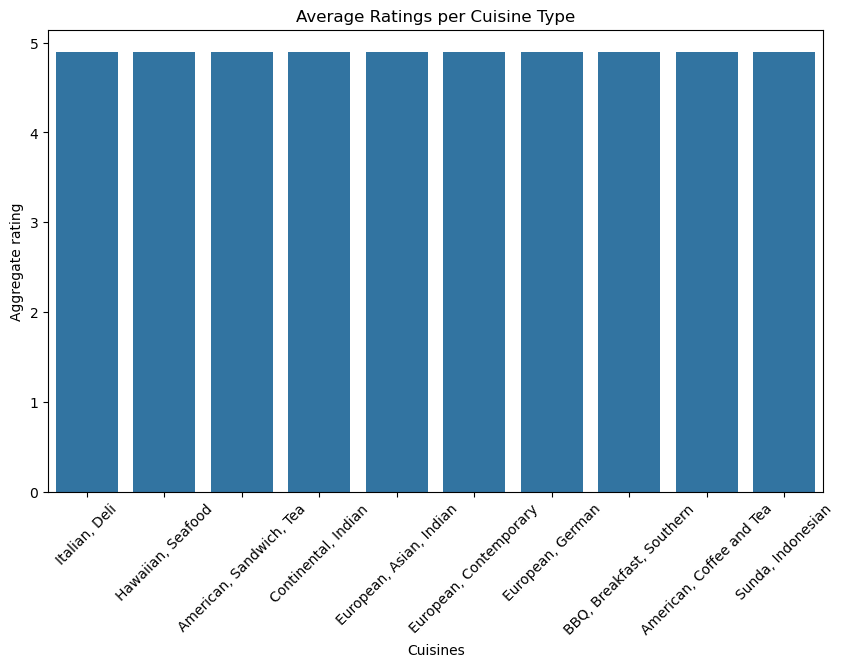

In [36]:
# Data Pipeline Execution
def run_pipeline(file_path):
    # Load the data
    data = load_data(file_path)
    
    # Clean the data
    cleaned_data = clean_data(data)
    
    # Transform the data
    transformed_data = transform_data(cleaned_data)
    
    # Analyze the data
    most_popular_cuisine = analyze_data(transformed_data)
    print(f"The most popular cuisine based on average ratings is: {most_popular_cuisine}")
    
    # Visualize the data
    visualize_data(transformed_data)

# Run the pipeline with your dataset
run_pipeline('Dataset1.csv')

In [26]:
df=pd.read_csv('Dataset1.csv')

In [28]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
